# Tutorial Tensorflow
# [Lo esencial en ~20 min]

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm

import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12439206797161430045, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10655911117
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2773986086899931626
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

Vamos con lo básico de tensorflow:

In [3]:
sess = tf.Session()

Construyamos nuestro primer modelo (función): una sigmoide

In [4]:
with tf.name_scope("Sigmoide"):
    x = tf.placeholder(tf.float32)
    y = tf.nn.sigmoid(2.5*x)

Evaluemos la función en x=1

In [5]:
ans = sess.run(y, feed_dict={
        x: 1.
        })

print(ans)

0.9241418


Ahora evaluemos la función en 1000 valores distintos entre -4 y 4. Para esto construimos un arreglo (1-Dimensional) en numpy y se lo damos como entrada al placeholder del modelo.  

x_data.shape = (1000,)


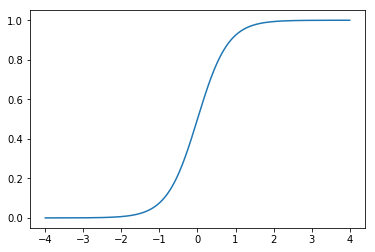

In [6]:
x_data = np.linspace(-4, 4, 1000)
print('x_data.shape =', x_data.shape)

y_data = sess.run(y, feed_dict={
        x: x_data
    })

plt.plot(x_data, y_data);

La gracia de tensorflow es que nos permite ajustar modelos (a.k.a. aprender) de manera muy fácil. Vamos al ejemplo más simple de todos: Regresión lineal unidimensional.

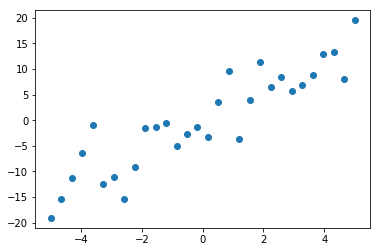

In [7]:
N = 30
x_value = np.linspace(-5, 5, N)
m_real = 2.741
n_real = -0.183
y_value = m_real*x_value + n_real + np.random.normal(0.0, 4.0, N)

plt.scatter(x_value, y_value);

Construyamos un modelo apropiado

In [8]:
with tf.name_scope('Linear_regression'):
    x = tf.placeholder(tf.float32, name='x')
    m = tf.Variable(tf.zeros([1]), name='m')
    n = tf.Variable(tf.zeros([1]), name='n')

    y = x*m + n

    target = tf.placeholder(tf.float32, name='target')

Usemos Mean Squared Error (MSE) como función objetivo a minimizar

In [9]:
with tf.name_scope('Linear_regression'):
    loss = tf.reduce_mean(tf.square(y-target))

Elijamos nuestro algoritmo de optimización.

In [10]:
with tf.name_scope("Linear_regression"):
    optimizer = tf.train.GradientDescentOptimizer(.1)
    training_step = optimizer.minimize(loss)

In [11]:
writer = tf.summary.FileWriter(".", sess.graph)

Ajustemos el modelo :)

In [12]:
sess.run(tf.global_variables_initializer())
for i in range(25):
    _, loss_value = sess.run([training_step, loss], feed_dict={
            x: x_value,
            target: y_value
        })
    print('Iteration %d, loss = %.2f' % (i, loss_value))

Iteration 0, loss = 91.14
Iteration 1, loss = 62.18
Iteration 2, loss = 44.49
Iteration 3, loss = 33.69
Iteration 4, loss = 27.08
Iteration 5, loss = 23.05
Iteration 6, loss = 20.59
Iteration 7, loss = 19.08
Iteration 8, loss = 18.16
Iteration 9, loss = 17.60
Iteration 10, loss = 17.26
Iteration 11, loss = 17.05
Iteration 12, loss = 16.92
Iteration 13, loss = 16.84
Iteration 14, loss = 16.79
Iteration 15, loss = 16.76
Iteration 16, loss = 16.75
Iteration 17, loss = 16.74
Iteration 18, loss = 16.73
Iteration 19, loss = 16.72
Iteration 20, loss = 16.72
Iteration 21, loss = 16.72
Iteration 22, loss = 16.72
Iteration 23, loss = 16.72
Iteration 24, loss = 16.72


Veamos el resultado

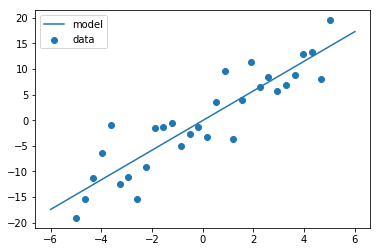

In [13]:
plt.scatter(x_value, y_value, label='data')
x_dense = np.linspace(-6, 6, 1000)
y_model = sess.run(y, feed_dict={
        x: x_dense
    })
plt.plot(x_dense, y_model, label='model')
plt.legend();

---
# Nuevamente... la Regresión Logística

## Crear base de datos

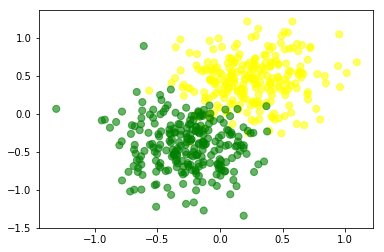

(500, 2) (500,)


In [14]:
def simulate_2d_gaussian_data(n_samples, distance, angle, sigma):
    mu = np.array([
        np.cos(angle)*distance/2,
        np.sin(angle)*distance/2
    ])
    n_samples_per_class = int(n_samples/2)
    n_samples = n_samples_per_class * 2
    x1 = np.random.randn(n_samples_per_class, 2)*sigma + mu
    x2 = np.random.randn(n_samples_per_class, 2)*sigma - mu
    
    s = [50]*n_samples_per_class
    
    plt.scatter(x1[:, 0], x1[:, 1], c='yellow', s=s, alpha=0.6)
    plt.scatter(x2[:, 0], x2[:, 1], c='green', s=s, alpha=0.6)
    plt.show()
    
    x = np.concatenate([x1, x2], axis=0)
    d = np.concatenate([
        np.ones(n_samples_per_class),
        np.zeros(n_samples_per_class)
    ])

    new_order = np.random.permutation(range(n_samples))
    x = x[new_order]
    d = d[new_order]
    
    return x, d

X, d = simulate_2d_gaussian_data(500, 1, np.pi/3, 0.3)
print(X.shape, d.shape)

## Dividir en Train Test

In [15]:
from sklearn.model_selection import train_test_split

test_size = 0.2
data_array = X
data_labels = d

print("Dataset Samples: %i, Number of 1 labels %i, Number of 0 labels %i\n labels ratio %.2f\n" %
     (data_array.shape[0], np.where(data_labels==1)[0].shape[0], np.where(data_labels==0)[0].shape[0],
     np.where(data_labels==1)[0].shape[0]/np.where(data_labels==0)[0].shape[0]))

train_array, test_array, train_labels, test_labels = train_test_split(data_array, data_labels,
                                                    test_size=test_size,
                                                    random_state=42,
                                                    stratify=data_labels)

print("Train Samples: %i, Number of 1 labels %i, Number of 0 labels %i\n labels ratio %.2f\n" %
     (train_array.shape[0], np.where(train_labels==1)[0].shape[0], np.where(train_labels==0)[0].shape[0],
     np.where(train_labels==1)[0].shape[0]/np.where(train_labels==0)[0].shape[0]))
print("Test Samples: %i, Number of 1 labels %i, Number of 0 labels %i\n labels ratio %.2f\n"%
     (test_array.shape[0], np.where(test_labels==1)[0].shape[0], np.where(test_labels==0)[0].shape[0],
     np.where(test_labels==1)[0].shape[0]/np.where(test_labels==0)[0].shape[0]))

print("Train/Dataset samples ratio %.2f - Test/Dataset samples ratio %.2f" %
     (train_array.shape[0]/data_array.shape[0], test_array.shape[0]/data_array.shape[0]))

Dataset Samples: 500, Number of 1 labels 250, Number of 0 labels 250
 labels ratio 1.00

Train Samples: 400, Number of 1 labels 200, Number of 0 labels 200
 labels ratio 1.00

Test Samples: 100, Number of 1 labels 50, Number of 0 labels 50
 labels ratio 1.00

Train/Dataset samples ratio 0.80 - Test/Dataset samples ratio 0.20


In [16]:
from batch_generator import dataset

BATCH_SIZE = 32
train_data_set = dataset(train_array, train_labels, BATCH_SIZE)
test_data_set = dataset(test_array, test_labels, BATCH_SIZE)

Vamos con lo básico de tensorflow:

In [17]:
#config = tf.ConfigProto(allow_soft_placement=True)
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)

## Construir Grafo (inputs, modelo, costos)

In [18]:
#input placeholders for feeding in data during training and evaluation
with tf.name_scope("inputs"):
    # X.shape = n_samples x 2
    input_batch = tf.placeholder(shape=[None, X.shape[1]], dtype=tf.float32, name="input_batch")
    input_labels = tf.placeholder(shape=None, dtype=tf.float32, name="labels") #also called targets


    
# Build logistic model
with tf.name_scope("model"):
    initializer = tf.constant_initializer(0.0) #tf.truncated_normal_initializer(stddev=0.5)
    # W.shape = 2x1
    weights =  tf.Variable(initializer(shape=[2,1]), name = 'weights')
    #logistic op
    output = 1.0/(1.0+tf.exp(-tf.squeeze(tf.matmul(input_batch,weights)))) #tf.nn.sigmoid(input_batch*weights)

#choose a cost function
with tf.name_scope('cross-entropy_cost'):
    log_argument = tf.pow(output, input_labels)*tf.pow(1-output,1-input_labels)
    loss = -tf.reduce_mean(tf.log(log_argument))
    #loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=input_labels, logits=tf.squeeze(tf.matmul(input_batch,weights))))

# Define summaries to visualize data in tensorboard
tf.summary.histogram('logistic_output', output)
tf.summary.scalar('loss', loss)
merged = tf.summary.merge_all()


Init model parameters, saver and summaries

In [19]:
#init weights
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

#to save model parameters
saver = tf.train.Saver() #saver.save(sess, checkpoint_path)

#writer of summaries
train_writer = tf.summary.FileWriter('train_tb', sess.graph) #train_writer.add_summary(summ, it)
#train_writer.close()

## Se define optimizador

In [20]:
#define optimizer, calculate gradients, and adjust paremetrs accordingly
with tf.name_scope("Optimizer"):
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_step = optimizer.minimize(loss)

# Se entrena modelo

In [21]:
iterations = 1000

weight_history = []
xentropy_history = []

#train
for iteration in range(iterations):
    #get batch
    batch_array, batch_labels = train_data_set.get_batch()
    #perform trainning step and get some values
    _, loss_value, summ = sess.run([training_step, loss, merged], feed_dict={
            input_batch: batch_array,
            input_labels: batch_labels
        })
    weight_history.append(weights.eval(session=sess))
    xentropy_history.append(loss_value)
    print('[Iteración %d] Entropía cruzada: %.3f' % (iteration, loss_value))
    #add summaries to writer
    train_writer.add_summary(summ, iteration)
#after trainning finishes, close writer
train_writer.close()

[Iteración 0] Entropía cruzada: 0.693
[Iteración 1] Entropía cruzada: 0.687
[Iteración 2] Entropía cruzada: 0.680
[Iteración 3] Entropía cruzada: 0.671
[Iteración 4] Entropía cruzada: 0.671
[Iteración 5] Entropía cruzada: 0.664
[Iteración 6] Entropía cruzada: 0.651
[Iteración 7] Entropía cruzada: 0.645
[Iteración 8] Entropía cruzada: 0.657
[Iteración 9] Entropía cruzada: 0.641
[Iteración 10] Entropía cruzada: 0.637
[Iteración 11] Entropía cruzada: 0.633
[Iteración 12] Entropía cruzada: 0.637
[Iteración 13] Entropía cruzada: 0.610
[Iteración 14] Entropía cruzada: 0.606
[Iteración 15] Entropía cruzada: 0.606
[Iteración 16] Entropía cruzada: 0.608
[Iteración 17] Entropía cruzada: 0.607
[Iteración 18] Entropía cruzada: 0.587
[Iteración 19] Entropía cruzada: 0.586
[Iteración 20] Entropía cruzada: 0.597
[Iteración 21] Entropía cruzada: 0.586
[Iteración 22] Entropía cruzada: 0.586
[Iteración 23] Entropía cruzada: 0.552
[Iteración 24] Entropía cruzada: 0.568
[Iteración 25] Entropía cruzada: 0.

[Iteración 243] Entropía cruzada: 0.267
[Iteración 244] Entropía cruzada: 0.246
[Iteración 245] Entropía cruzada: 0.275
[Iteración 246] Entropía cruzada: 0.260
[Iteración 247] Entropía cruzada: 0.265
[Iteración 248] Entropía cruzada: 0.192
[Iteración 249] Entropía cruzada: 0.260
[Iteración 250] Entropía cruzada: 0.311
[Iteración 251] Entropía cruzada: 0.287
[Iteración 252] Entropía cruzada: 0.241
[Iteración 253] Entropía cruzada: 0.280
[Iteración 254] Entropía cruzada: 0.290
[Iteración 255] Entropía cruzada: 0.235
[Iteración 256] Entropía cruzada: 0.233
[Iteración 257] Entropía cruzada: 0.247
[Iteración 258] Entropía cruzada: 0.260
[Iteración 259] Entropía cruzada: 0.255
[Iteración 260] Entropía cruzada: 0.254
[Iteración 261] Entropía cruzada: 0.189
[Iteración 262] Entropía cruzada: 0.228
[Iteración 263] Entropía cruzada: 0.303
[Iteración 264] Entropía cruzada: 0.197
[Iteración 265] Entropía cruzada: 0.240
[Iteración 266] Entropía cruzada: 0.258
[Iteración 267] Entropía cruzada: 0.200


[Iteración 484] Entropía cruzada: 0.138
[Iteración 485] Entropía cruzada: 0.172
[Iteración 486] Entropía cruzada: 0.174
[Iteración 487] Entropía cruzada: 0.187
[Iteración 488] Entropía cruzada: 0.230
[Iteración 489] Entropía cruzada: 0.216
[Iteración 490] Entropía cruzada: 0.286
[Iteración 491] Entropía cruzada: 0.213
[Iteración 492] Entropía cruzada: 0.230
[Iteración 493] Entropía cruzada: 0.153
[Iteración 494] Entropía cruzada: 0.202
[Iteración 495] Entropía cruzada: 0.151
[Iteración 496] Entropía cruzada: 0.178
[Iteración 497] Entropía cruzada: 0.155
[Iteración 498] Entropía cruzada: 0.223
[Iteración 499] Entropía cruzada: 0.230
[Iteración 500] Entropía cruzada: 0.190
[Iteración 501] Entropía cruzada: 0.194
[Iteración 502] Entropía cruzada: 0.172
[Iteración 503] Entropía cruzada: 0.186
[Iteración 504] Entropía cruzada: 0.237
[Iteración 505] Entropía cruzada: 0.240
[Iteración 506] Entropía cruzada: 0.176
[Iteración 507] Entropía cruzada: 0.226
[Iteración 508] Entropía cruzada: 0.225


[Iteración 707] Entropía cruzada: 0.155
[Iteración 708] Entropía cruzada: 0.223
[Iteración 709] Entropía cruzada: 0.190
[Iteración 710] Entropía cruzada: 0.219
[Iteración 711] Entropía cruzada: 0.163
[Iteración 712] Entropía cruzada: 0.096
[Iteración 713] Entropía cruzada: 0.169
[Iteración 714] Entropía cruzada: 0.150
[Iteración 715] Entropía cruzada: 0.144
[Iteración 716] Entropía cruzada: 0.259
[Iteración 717] Entropía cruzada: 0.144
[Iteración 718] Entropía cruzada: 0.132
[Iteración 719] Entropía cruzada: 0.108
[Iteración 720] Entropía cruzada: 0.139
[Iteración 721] Entropía cruzada: 0.204
[Iteración 722] Entropía cruzada: 0.148
[Iteración 723] Entropía cruzada: 0.114
[Iteración 724] Entropía cruzada: 0.248
[Iteración 725] Entropía cruzada: 0.159
[Iteración 726] Entropía cruzada: 0.230
[Iteración 727] Entropía cruzada: 0.111
[Iteración 728] Entropía cruzada: 0.159
[Iteración 729] Entropía cruzada: 0.161
[Iteración 730] Entropía cruzada: 0.163
[Iteración 731] Entropía cruzada: 0.157


[Iteración 913] Entropía cruzada: 0.139
[Iteración 914] Entropía cruzada: 0.180
[Iteración 915] Entropía cruzada: 0.225
[Iteración 916] Entropía cruzada: 0.163
[Iteración 917] Entropía cruzada: 0.136
[Iteración 918] Entropía cruzada: 0.117
[Iteración 919] Entropía cruzada: 0.144
[Iteración 920] Entropía cruzada: 0.105
[Iteración 921] Entropía cruzada: 0.141
[Iteración 922] Entropía cruzada: 0.111
[Iteración 923] Entropía cruzada: 0.159
[Iteración 924] Entropía cruzada: 0.079
[Iteración 925] Entropía cruzada: 0.192
[Iteración 926] Entropía cruzada: 0.162
[Iteración 927] Entropía cruzada: 0.139
[Iteración 928] Entropía cruzada: 0.157
[Iteración 929] Entropía cruzada: 0.137
[Iteración 930] Entropía cruzada: 0.115
[Iteración 931] Entropía cruzada: 0.148
[Iteración 932] Entropía cruzada: 0.154
[Iteración 933] Entropía cruzada: 0.169
[Iteración 934] Entropía cruzada: 0.223
[Iteración 935] Entropía cruzada: 0.134
[Iteración 936] Entropía cruzada: 0.112
[Iteración 937] Entropía cruzada: 0.173


## Análisis de resultados

In [22]:
print('Valor final de los pesos: ', weights.eval(session=sess))
print('Ángulo del vector de pesos', np.arctan(weights.eval(session=sess)[1, 0]/weights.eval(session=sess)[0, 0])*180/np.pi)

Valor final de los pesos:  [[3.1435316]
 [4.7993097]]
Ángulo del vector de pesos 56.77533958889486


### ¿Cómo queda dividido el espacio de los ejemplos?

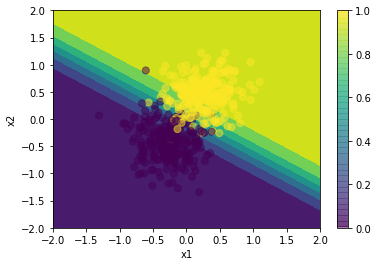

In [23]:
nx = 100
ny = 100
xx = np.linspace(-2, 2, nx)
yy = np.linspace(-2, 2, ny)

def logistic_model(X, W):
    out = 1.0/(1 + np.exp(-np.matmul(X, W).flatten()))
    # print('log_model', out.shape)
    return out

model_output = np.zeros([nx, ny])
for xi in range(nx):
    for yi in range(ny):
        x1 = xx[xi]
        x2 = yy[yi]
        model_output[xi, yi] = logistic_model(
            np.array([[x1, x2]]), weights.eval(session=sess)).flatten()

x_mesh, y_mesh = np.meshgrid(xx, yy)
plt.contourf(x_mesh, y_mesh, model_output.T, cmap=cm.viridis)
plt.scatter(X[:, 0], X[:, 1], c=d, cmap=cm.viridis, alpha=0.5, s=[50]*len(X))
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

### Visualización de los parámetros

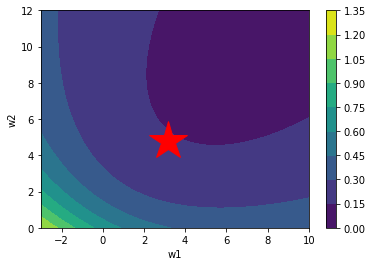

In [24]:
nx = 100
ny = 100
xx = np.linspace(-3, 10, nx)
yy = np.linspace(0, 12, ny)

def xentropy(X, d, W):
    mu = logistic_model(X, W)
    log_argument = np.power(mu, d)*np.power(1-mu, 1-d)
    return -np.mean(np.log(log_argument))

xentropy_values = np.zeros([nx, ny])
for xi in range(nx):
    for yi in range(ny):
        w1 = xx[xi]
        w2 = yy[yi]
        xentropy_values[xi, yi] = xentropy(
            X, 
            d,
            np.array([[w1], [w2]])
        )

x_mesh, y_mesh = np.meshgrid(xx, yy)
plt.contourf(x_mesh, y_mesh, xentropy_values.T, cmap=cm.viridis)
plt.plot(weights.eval(session=sess)[0, 0], weights.eval(session=sess)[1, 0], 'r*', markersize=40)
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
plt.show()

### Visualización de la optimización con GD

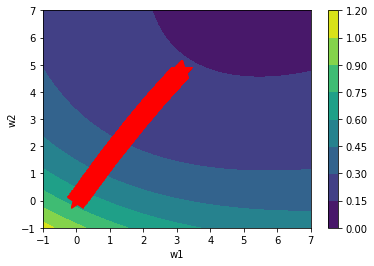

In [25]:
nx = 100
ny = 100
xx = np.linspace(-1, 7, nx)
yy = np.linspace(-1, 7, ny)

xentropy_values = np.zeros([nx, ny])
for xi in range(nx):
    for yi in range(ny):
        w1 = xx[xi]
        w2 = yy[yi]
        xentropy_values[xi, yi] = xentropy(
            X, 
            d,
            np.array([[w1], [w2]])
        )

x_mesh, y_mesh = np.meshgrid(xx, yy)
plt.contourf(x_mesh, y_mesh, xentropy_values.T, cmap=cm.viridis)

for iteration in range(0, iterations, 1):
    plt.plot(weight_history[iteration][0, 0], weight_history[iteration][1, 0], 'r*', markersize=20, alpha=0.9)
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
plt.show()

### Curva de aprendizaje

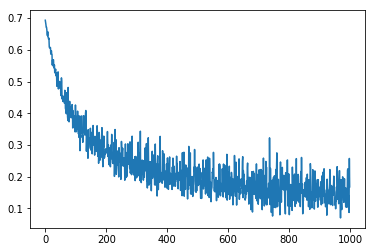

In [26]:
plt.plot(xentropy_history)
plt.show()